In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style(style='white')
%matplotlib inline
sns.set(font_scale=1.2)

In [22]:
#Prediction whether a customer is going to churn based on the various usage parameters of the online E-Commerce company

In [23]:
data=pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm')

In [24]:
data_copy=data.copy()

In [25]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [26]:
data.duplicated().sum()

0

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [28]:
data.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CashbackAmount                   0
PreferredPaymentMode             0
Churn                            0
PreferredLoginDevice             0
CityTier                         0
NumberOfDeviceRegistered         0
Gender                           0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
CustomerID                       0
dtype: int64

Tenure	Tenure of customer in organization(in months)
HourSpendOnApp	Number of hours spend on mobile application or website (what unit?)
OrderAmountHikeFromlastYear	Percentage increases in order from last year
CouponUsed	Total number of coupon has been used in last month
OrderCount	Total number of orders has been places in last month
DaySinceLastOrder	Day Since last order by customer
CashbackAmount	Average cashback in last month
WarehouseToHome	Distance in between warehouse to home of customer


In [29]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Continuous variables - 'Tenure','WarehouseToHome','HourSpendOnApp','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
Categorical variables - 'Churn' ,'PreferredLoginDevice', 'CityTier','PreferredPaymentMode', 'Gender','PreferedOrderCat', 'SatisfactionScore','MaritalStatus', 'Complain',CouponUsed

Ordinal variables = SatisfactionScore,CityTier

In [30]:
data.describe(include='object').T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [31]:
cat=['Churn' ,'PreferredLoginDevice', 'CityTier','PreferredPaymentMode', 'Gender','PreferedOrderCat', 'SatisfactionScore','MaritalStatus','Complain']

CouponUsed is categorical or continuous?
Hours spend on app?

In [ ]:
fig,axes = plt.subplots(2,7,figsize=(20,15))
plt.subplots_adjust(hspace = 0.5,wspace = 0.5)
for i,j in zip(cat,axes.flatten()):
    sns.countplot(df_ecom2[i],ax = j,order = df_ecom2[i].value_counts().index)
    j.set_title(i)
    j.set_xticklabels(df_ecom2[i].value_counts().index,rotation = 90)

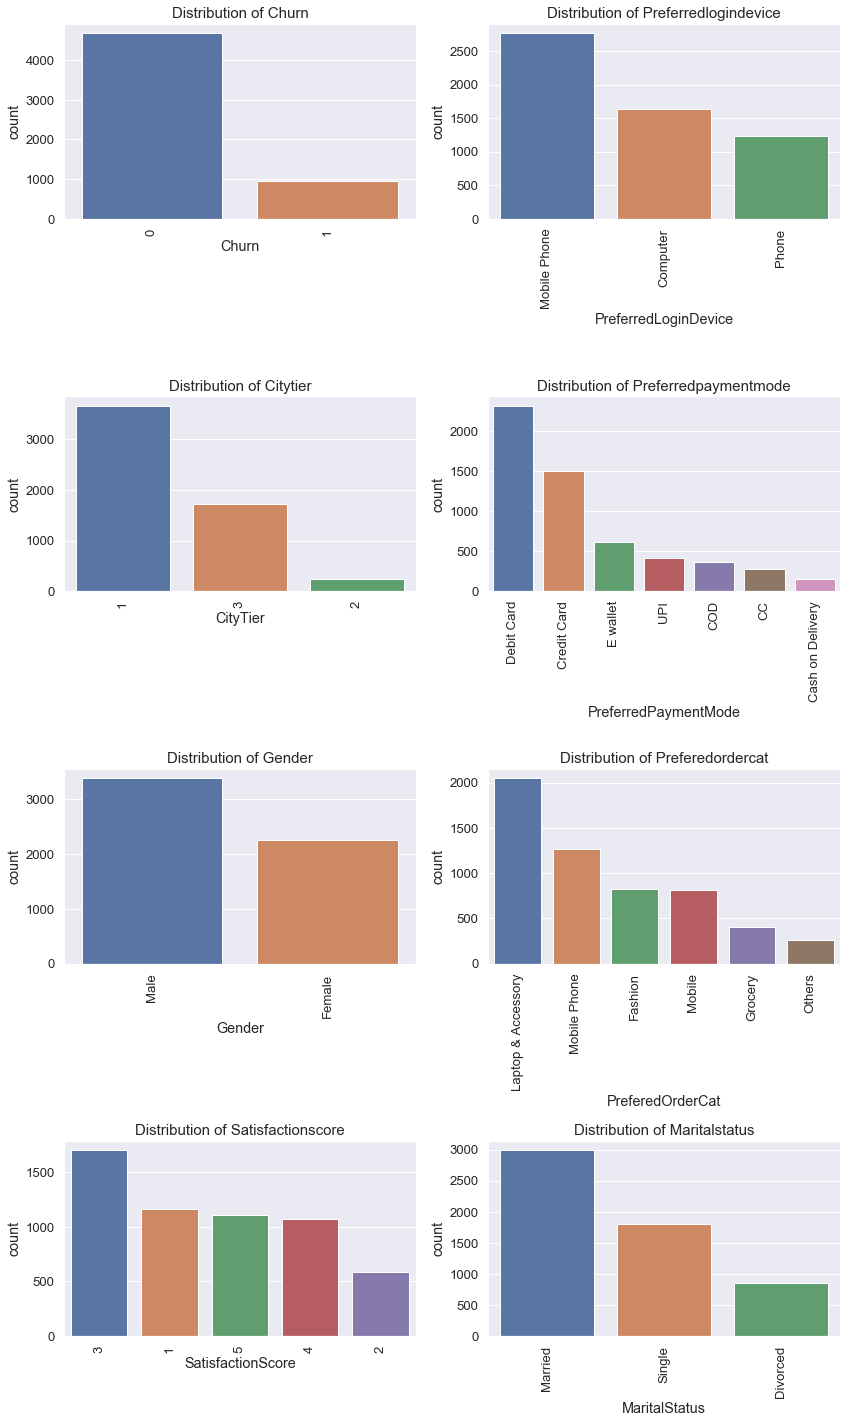

In [56]:
fig,ax=plt.subplots(4,2)
fig.set_size_inches(12,20)
i=0
for col,i in zip(cat,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.countplot(data[col],order=data[col].value_counts(normalize=True).index,ax=i)
    i.set_title("Distribution of "+col.title(),fontsize=15)
    i.set_xticklabels(data[col].value_counts().index,rotation = 90)
    plt.tight_layout()
    

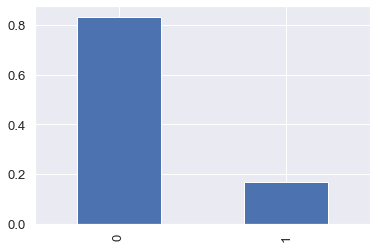

In [60]:
data.Churn.value_counts(normalize=True).plot(kind='bar')

In [13]:
#Married can be merged to Single

In [14]:
data.PreferredPaymentMode=data.PreferredPaymentMode.str.replace('CC','Credit Card')
data.PreferredPaymentMode=data.PreferredPaymentMode.str.replace('COD','Cash on Delivery')
data.MaritalStatus=data.MaritalStatus.str.replace('Divorced','Single')
data.PreferedOrderCat=data.PreferedOrderCat.str.replace('^Mobile$','Mobile Phone')
data['CityTier'] = data['CityTier'].apply(lambda x: 'Tier-1' if x == 1 else ('Tier-2' if x == 2 else 'Tier-3'))

#### Categories after cleaning

In [16]:
len(cat)

9

Churn
0    0.83
1    0.17
Name: Churn, dtype: float64 

PreferredLoginDevice
Mobile Phone    0.71
Computer        0.29
Name: PreferredLoginDevice, dtype: float64 

CityTier
1    0.65
3    0.31
2    0.04
Name: CityTier, dtype: float64 

PreferredPaymentMode
Debit Card          0.41
Credit Card         0.32
E wallet            0.11
Cash on Delivery    0.09
UPI                 0.07
Name: PreferredPaymentMode, dtype: float64 

Gender
Male      0.6
Female    0.4
Name: Gender, dtype: float64 

PreferedOrderCat
Mobile Phone          0.37
Laptop & Accessory    0.36
Fashion               0.15
Grocery               0.07
Others                0.05
Name: PreferedOrderCat, dtype: float64 

SatisfactionScore
3    0.30
1    0.21
5    0.20
4    0.19
2    0.10
Name: SatisfactionScore, dtype: float64 

MaritalStatus
Married    0.53
Single     0.47
Name: MaritalStatus, dtype: float64 

Complain
0    0.72
1    0.28
Name: Complain, dtype: float64 



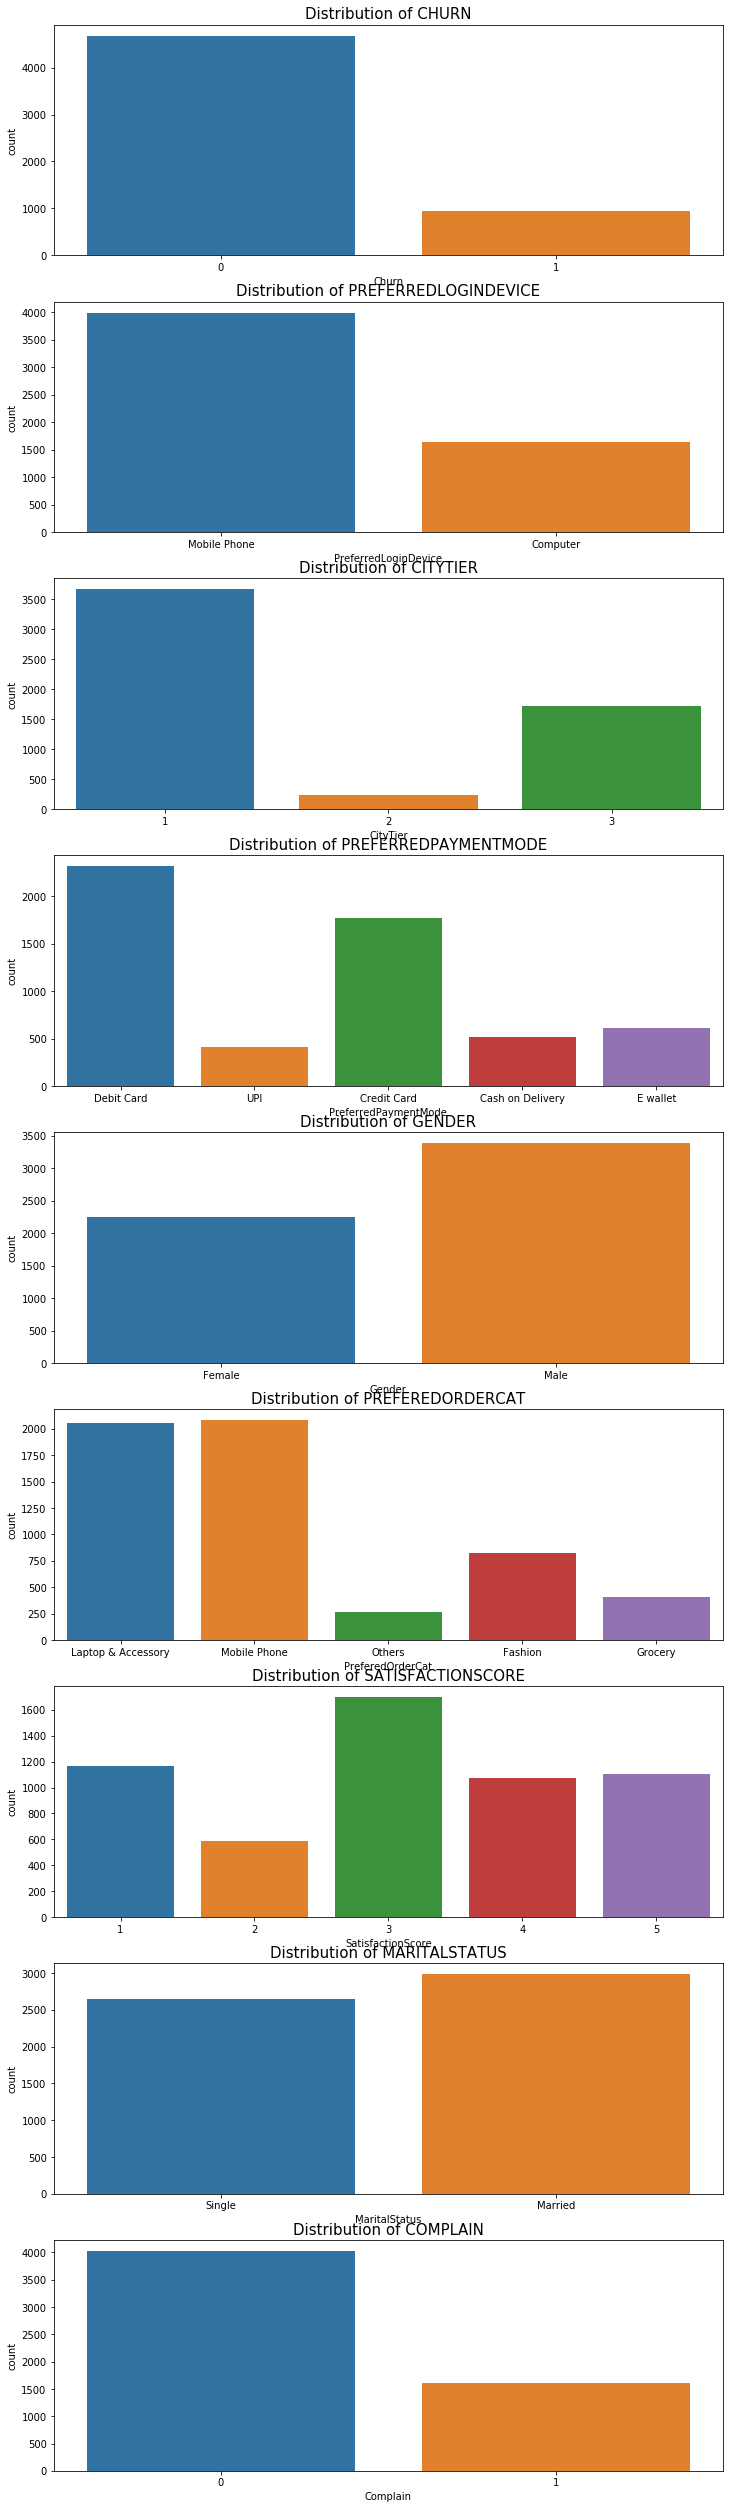

In [20]:
fig,ax=plt.subplots(nrows=9,ncols=1)
fig.set_size_inches(12,45)
i=0
for col in cat:
    print(col)
    print(data[col].value_counts(normalize=True).round(2),'\n')
    a=sns.countplot(data[col],ax=ax[i])
    a.set_title("Distribution of "+col.upper(),fontsize=15)
    i=i+1


In [147]:
data.describe(include='object').T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,2,Married,2986


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BC298E6C8>,
      dtype=object)

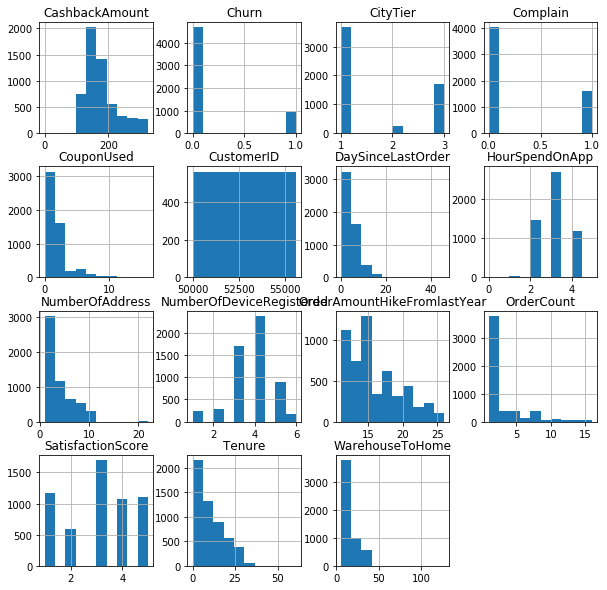

In [148]:
data.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BB9A00548>,
      dtype=object)

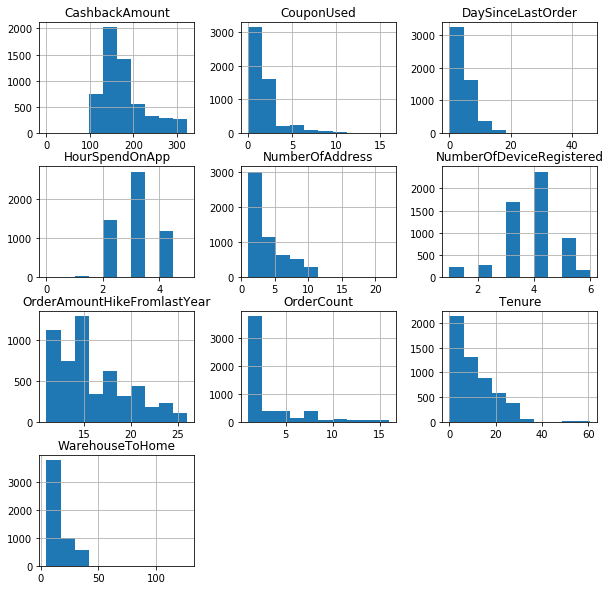

In [149]:
cont=['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
data[cont].hist(figsize=(10,10))

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [211]:
data[data.Tenure==1]['CouponUsed'].describe()#If tenure is less, Coupon used will be less

count    690.000000
mean       1.833333
std        1.378791
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       16.000000
Name: CouponUsed, dtype: float64

In [28]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

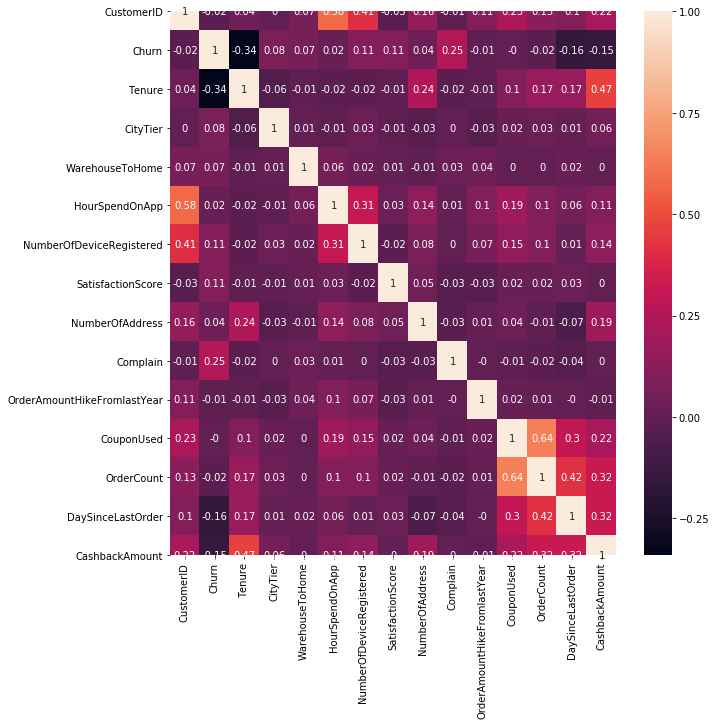

In [155]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().round(2),annot=True)

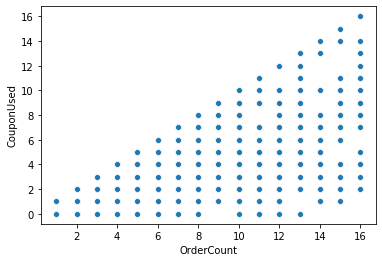

In [131]:
sns.scatterplot(data.OrderCount,data.CouponUsed)

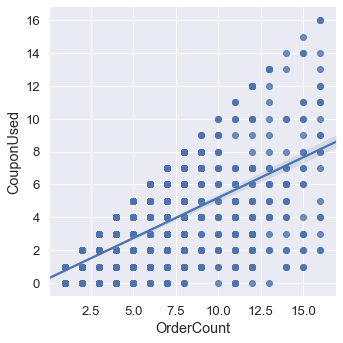

In [58]:
sns.lmplot('OrderCount','CouponUsed',data)

In [ ]:
#can use linear regression to impute order count and Coupon used
# remove order count=0 from model

In [90]:
data.groupby('CityTier')['WarehouseToHome'].describe()

,count,mean,std,min,25%,50%,75%,max
CityTier,,,,,,,,
1,3460.0,15.597399,8.313463,5.0,9.0,13.0,21.0,36.0
2,234.0,14.978632,8.117933,6.0,9.0,13.0,18.0,33.0
3,1685.0,15.818991,9.015090,5.0,9.0,14.0,20.0,127.0


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [151]:
data.WarehouseToHome.median()

14.0

In [152]:
data.Tenure=data.Tenure.fillna(data.Tenure.median())
data.WarehouseToHome=data.WarehouseToHome.fillna(data.WarehouseToHome.median())
data.HourSpendOnApp=data.HourSpendOnApp.fillna(data.HourSpendOnApp.median())
data.OrderAmountHikeFromlastYear=data.OrderAmountHikeFromlastYear.fillna(data.OrderAmountHikeFromlastYear.median())
data.CouponUsed=data.CouponUsed.fillna(data.CouponUsed.median())
data.OrderCount=data.OrderCount.fillna(data.OrderCount.median())
data.DaySinceLastOrder=data.DaySinceLastOrder.fillna(data.DaySinceLastOrder.median())

In [156]:
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [29]:
data.groupby('Churn').mean()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,,,,,,,,,,,,,,
0,52829.455575,11.502334,1.619821,15.353931,2.925530,3.639257,3.001282,4.162965,0.234088,15.724893,1.758232,3.046601,4.807406,180.635203
1,52746.575949,3.379469,1.827004,17.134259,2.961798,3.934599,3.390295,4.466245,0.535865,15.627409,1.717021,2.823656,3.236018,160.370928


In [ ]:
Complain is higher for people who churned
Avg tenure is high for customers not churned

In [31]:
data.groupby('Churn')[['Tenure','SatisfactionScore','Complain','OrderCount','CashbackAmount']].describe().T

Churn                              0           1
Tenure            count  4499.000000  867.000000
                  mean     11.502334    3.379469
                  std       8.419217    5.486089
                  min       0.000000    0.000000
                  25%       5.000000    0.000000
                  50%      10.000000    1.000000
                  75%      17.000000    3.000000
                  max      61.000000   21.000000
SatisfactionScore count  4682.000000  948.000000
                  mean      3.001282    3.390295
                  std       1.378722    1.342031
                  min       1.000000    1.000000
                  25%       2.000000    3.000000
                  50%       3.000000    3.000000
                  75%       4.000000    5.000000
                  max       5.000000    5.000000
Complain          count  4682.000000  948.000000
                  mean      0.234088    0.535865
                  std       0.423473    0.498975
                  min       0.000000    0.000000
                  25%       0.000000    0.000000
                  50%       0.000000    1.000000
                  75%       0.000000    1.000000
                  max       1.000000    1.000000
OrderCount        count  4442.000000  930.000000
                  mean      3.046601    2.823656
                  std       2.964982    2.809924
                  min       1.000000    1.000000
                  25%       1.000000    1.000000
                  50%       2.000000    2.000000
                  75%       3.000000    3.000000
                  max      16.000000   16.000000
CashbackAmount    count  4682.000000  948.000000
                  mean    180.635203  160.370928
                  std      50.434791   38.436055
                  min       0.000000  110.090000
                  25%     147.240000  132.020000
                  50%     166.115000  149.660000
                  75%     201.250000  174.690000
                  max     324.990000  323.590000

In [ ]:
75% customers who churned were with us less than 3 months
Churned customers -  53% complains
not much difference in order count distribution & cashback amount


In [37]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

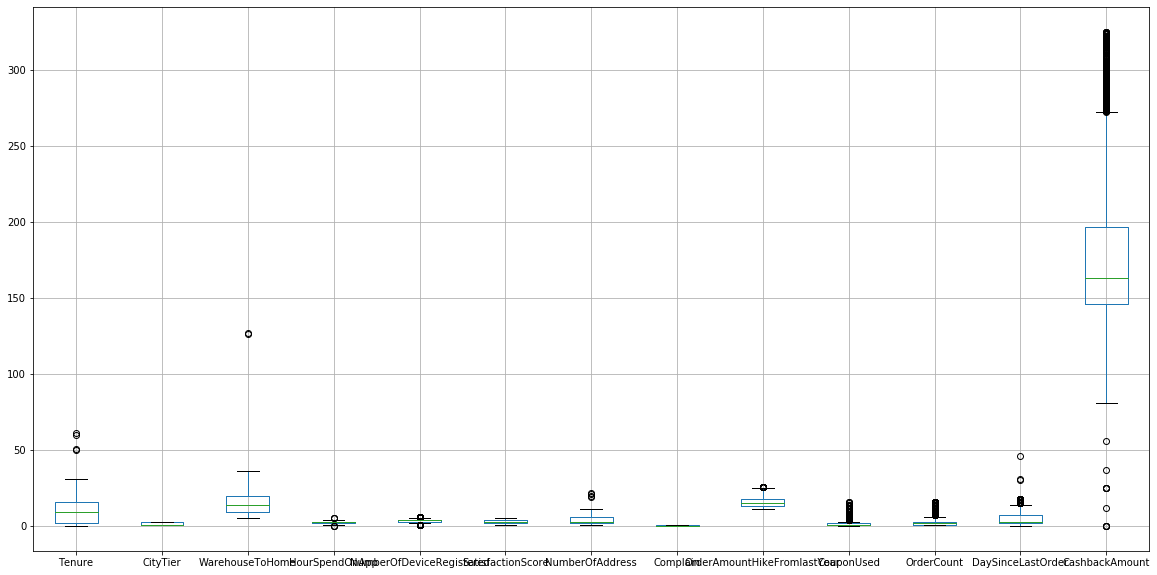

In [41]:
data[['Tenure', 'PreferredLoginDevice', 'CityTier','WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp','NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','DaySinceLastOrder', 'CashbackAmount']].boxplot(figsize=(20,10))

In [106]:
cont

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

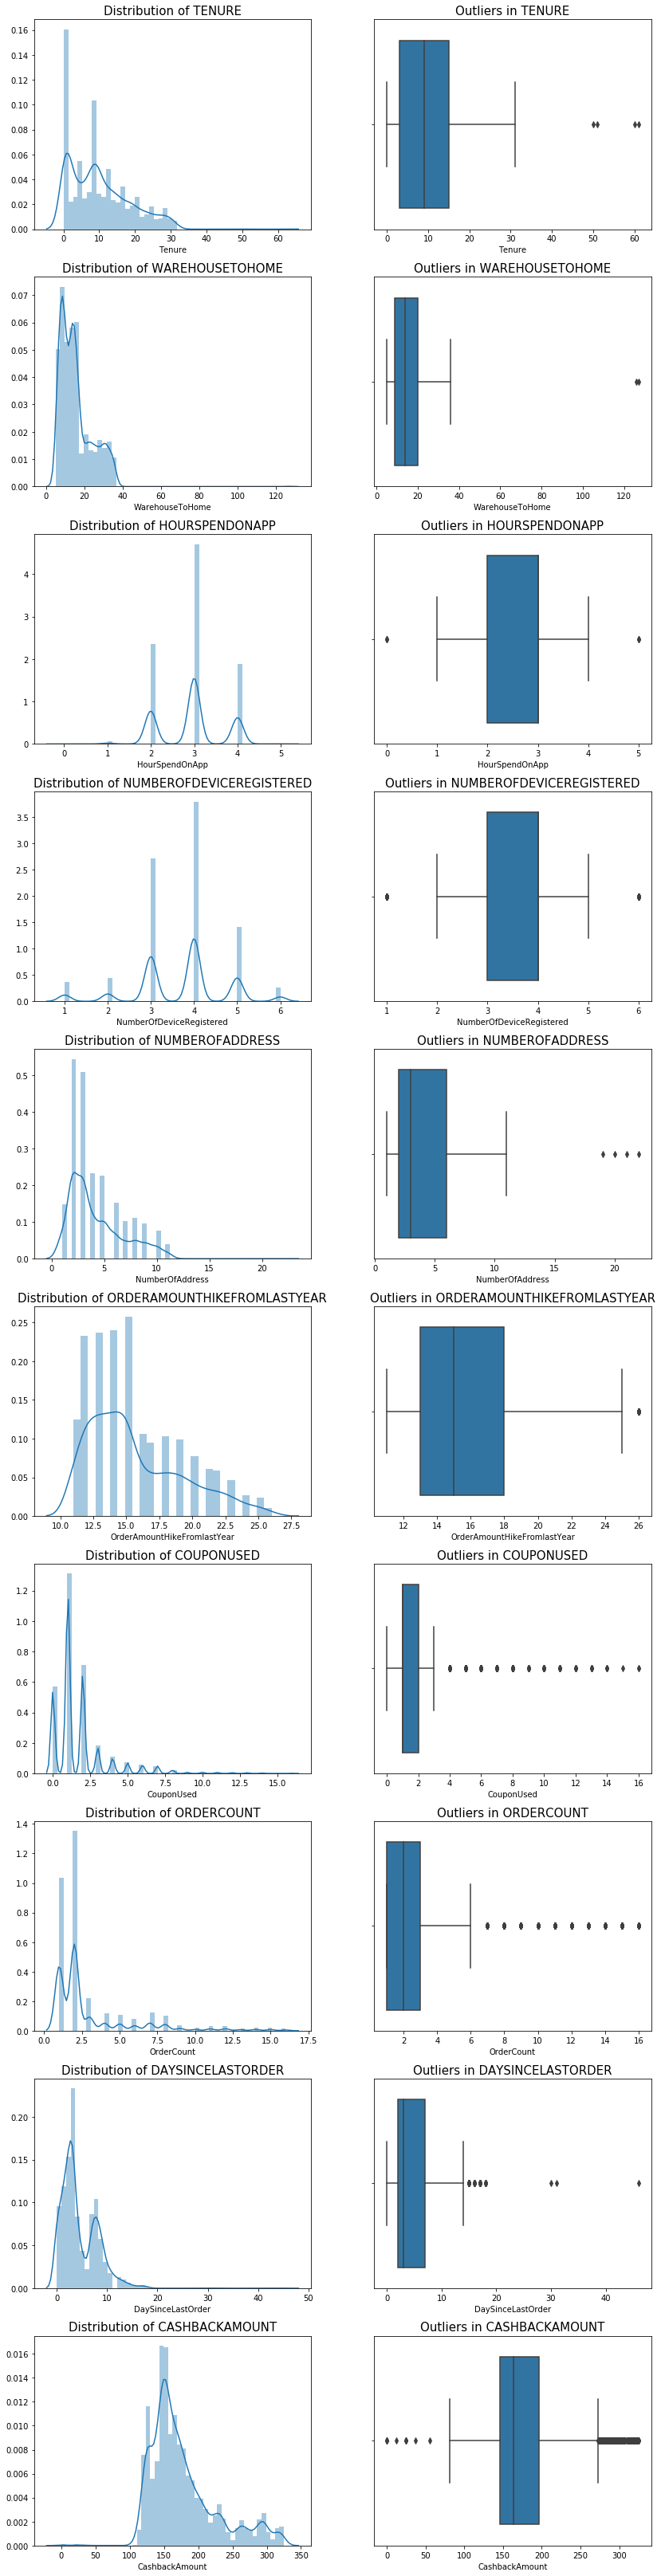

In [158]:
fig,ax=plt.subplots(nrows=10,ncols=2)
fig.set_size_inches(12,45)
i=0
for col in cont:
    a=sns.distplot(data[col],ax=ax[i][0])
    a.set_title("Distribution of "+col.upper(),fontsize=15)
    a=sns.boxplot(data[col],ax=ax[i][1])
    a.set_title("Outliers in "+col.upper(),fontsize=15)
    i=i+1
plt.tight_layout()
plt.savefig('univariate.jpg')

In [189]:
data[data.Tenure>32] #many 31

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Single,1,0,24.0,1.0,2.0,8.0,149.00
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,1.0,1.0,0.0,278.75
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Single,2,0,25.0,2.0,3.0,9.0,174.00
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,15.0,1.0,2.0,1.0,303.75


In [196]:
data[data.WarehouseToHome>100]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile Phone,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


TypeError: unsupported operand type(s) for +: 'float' and 'str'

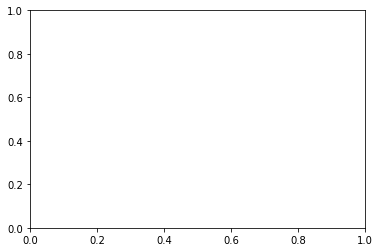

In [197]:
sns.boxplot(data[data.WarehouseToHome<100])

In [207]:
data[data.NumberOfAddress>12]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
260,50261,1,9.0,Computer,1,10.0,Cash on Delivery,Male,2.0,3,Mobile Phone,2,Single,19,1,23.0,1.0,1.0,0.0,122.85
691,50692,0,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,21,0,15.0,1.0,1.0,3.0,167.82
3075,53076,1,1.0,Computer,1,11.0,Cash on Delivery,Male,3.0,4,Mobile Phone,2,Single,20,1,24.0,2.0,2.0,1.0,147.85
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82


In [111]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


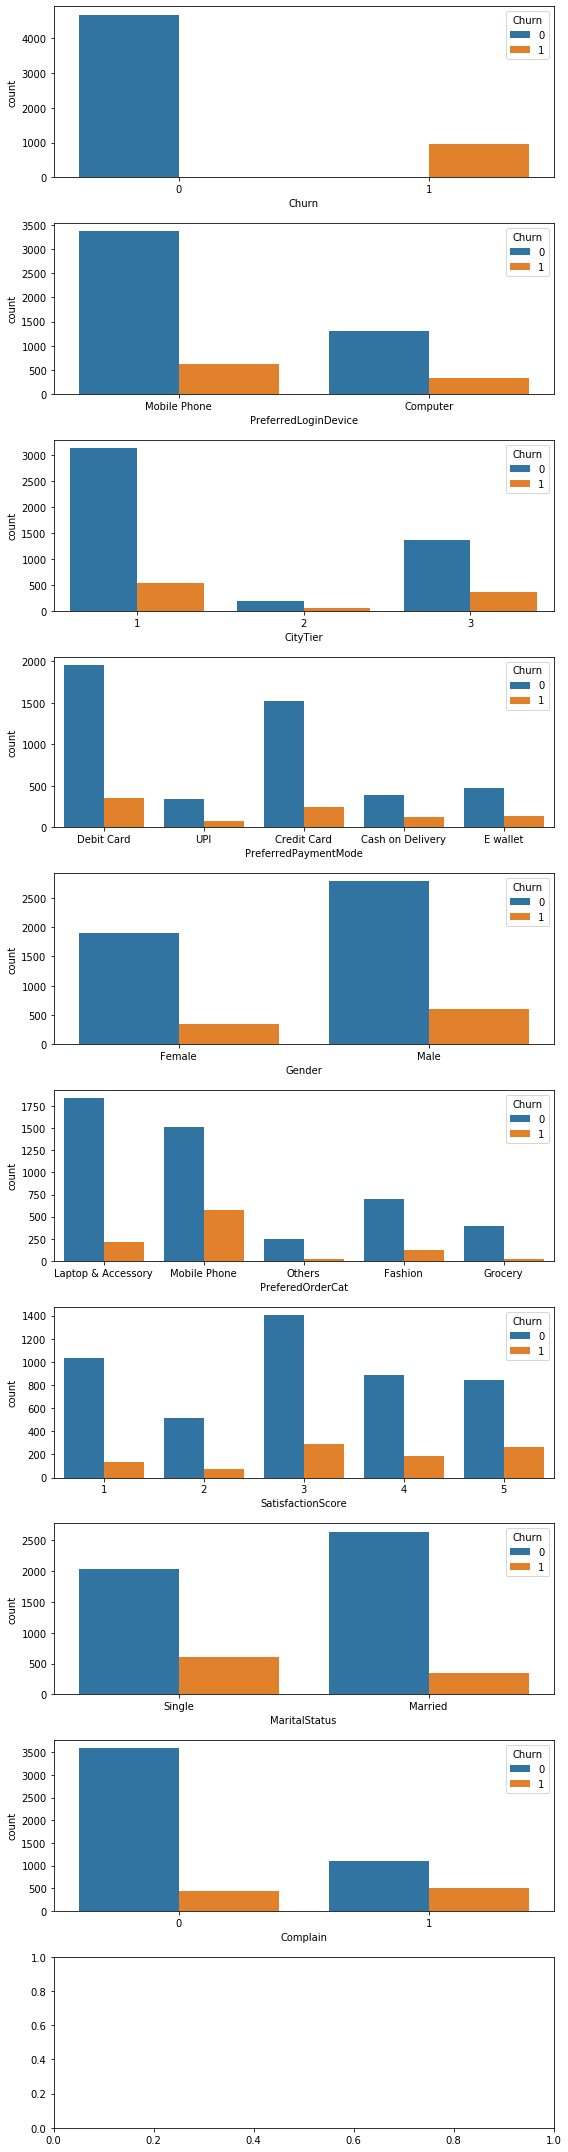

In [170]:
fig,ax=plt.subplots(nrows=9)
fig.set_size_inches(8,30)
i=0
for col in cat:
    a=sns.countplot(data[col],hue=data['Churn'],ax=ax[i])
    a.set_title("Distribution of "+col.upper(),fontsize=15)
    i=i+1
plt.tight_layout()
plt.savefig('univariate.jpg')

In [ ]:
#Huge % of people who raised a complain churned.
#more people who churned have satisfaction score 4/5

In [202]:
cont_Churn=cont+['Churn']

In [204]:
cont_Churn

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Churn']

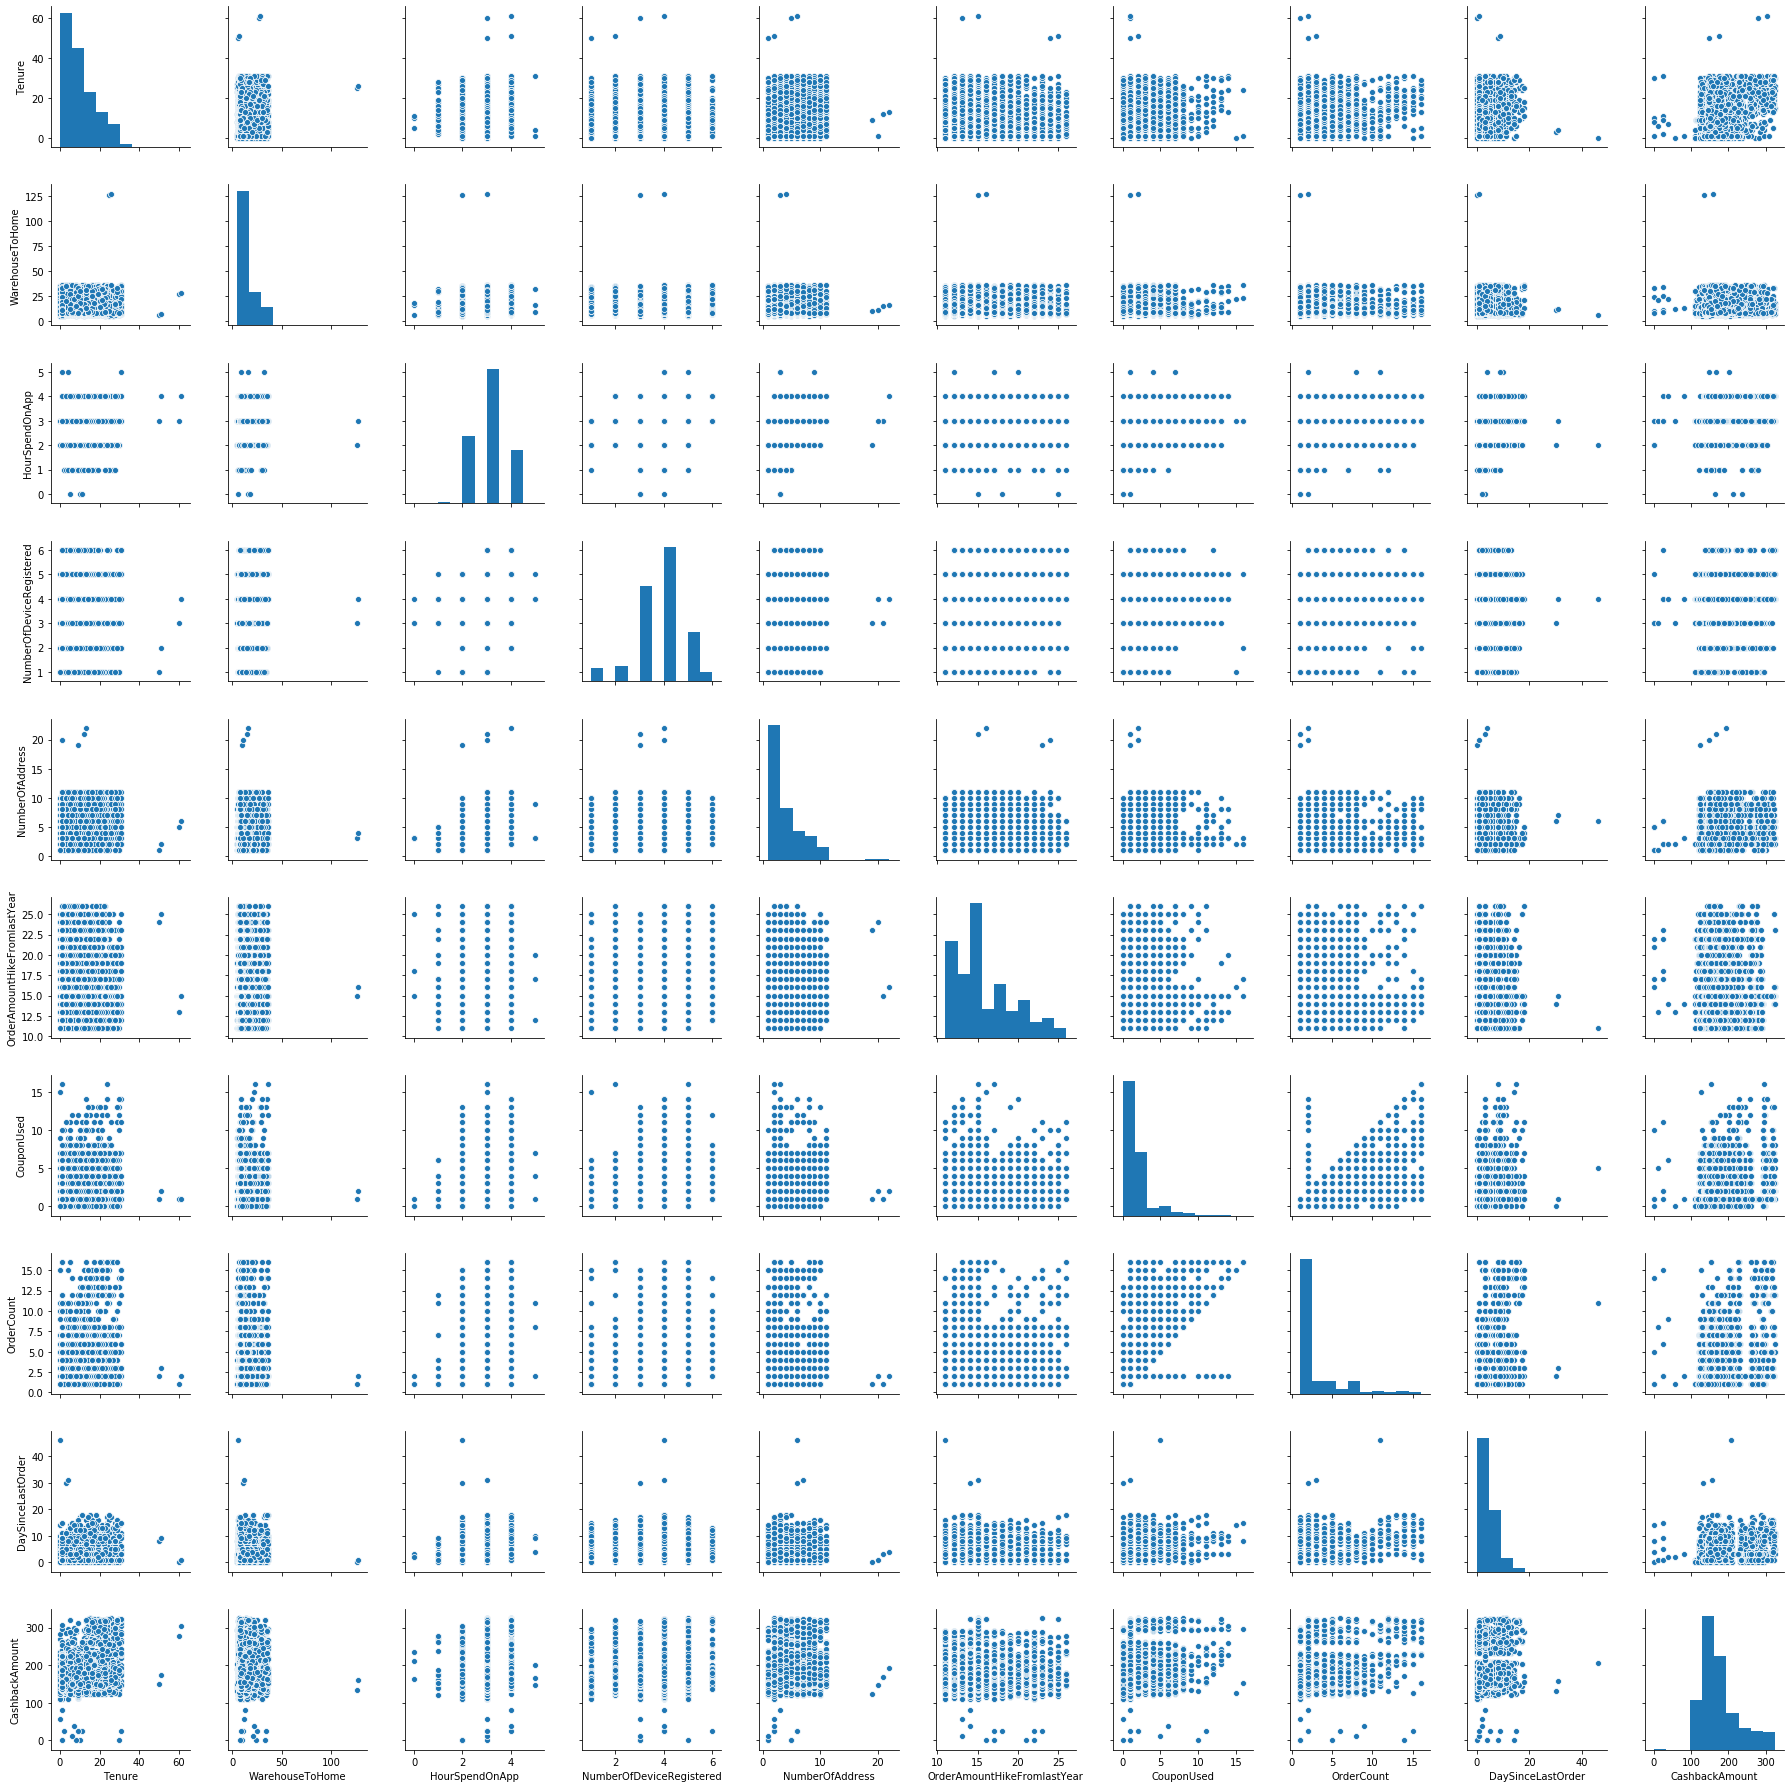

In [200]:
sns.pairplot(data[cont])

C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\chith\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


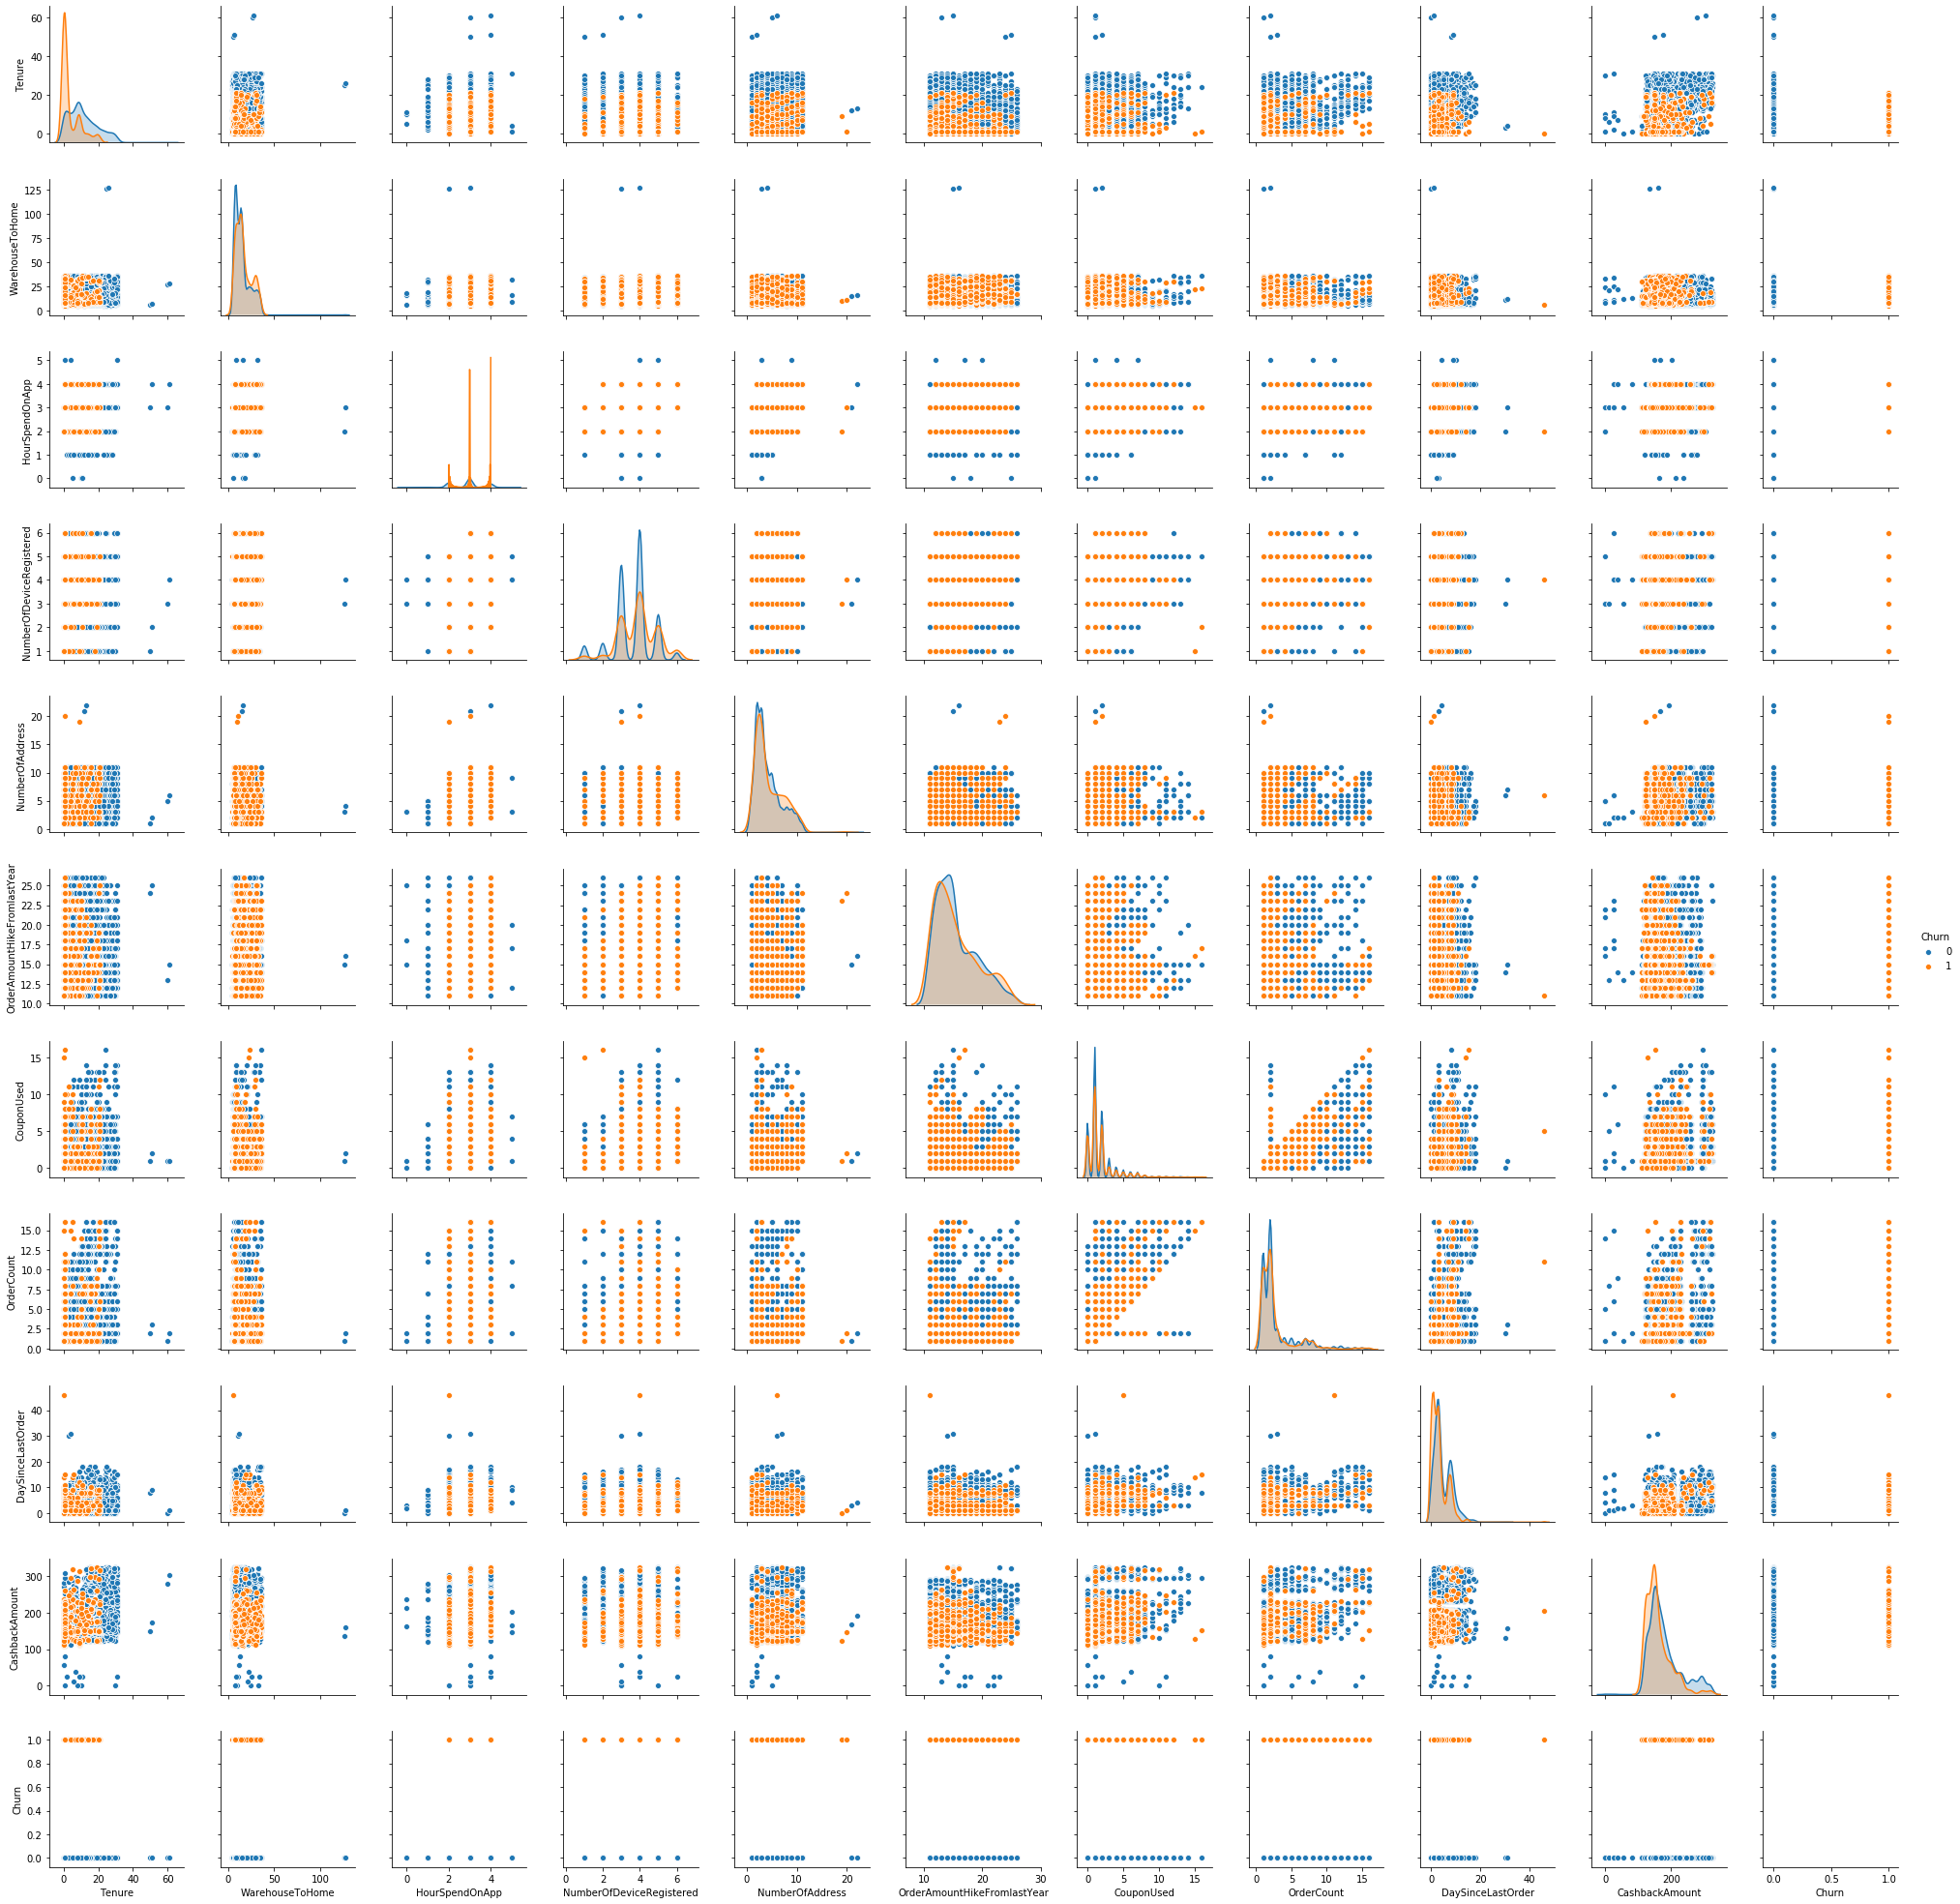

In [205]:
sns.pairplot(data[cont_Churn],hue='Churn')

In [ ]:
#Make pivot table

In [171]:
pd.pivot_table(data,columns='Churn')

Churn,0,1
CashbackAmount,180.635203,160.370928
CityTier,1.619821,1.827004
Complain,0.234088,0.535865
CouponUsed,1.718069,1.710970
CustomerID,52829.455575,52746.575949
DaySinceLastOrder,4.709739,3.222574
HourSpendOnApp,2.928663,2.964135
NumberOfAddress,4.162965,4.466245
NumberOfDeviceRegistered,3.639257,3.934599
OrderAmountHikeFromlastYear,15.686032,15.618143


In [175]:
pd.crosstab(data.SatisfactionScore,data.Churn,margins=True,normalize=True).round(2)

Churn,0,1,All
SatisfactionScore,,,
1,0.18,0.02,0.21
2,0.09,0.01,0.10
3,0.25,0.05,0.30
4,0.16,0.03,0.19
5,0.15,0.05,0.20
All,0.83,0.17,1.00


In [174]:
pd.crosstab(data.SatisfactionScore,data.Churn,margins=True)

Churn,0,1,All
SatisfactionScore,,,
1,1030,134,1164
2,512,74,586
3,1406,292,1698
4,890,184,1074
5,844,264,1108
All,4682,948,5630


In [180]:
pd.crosstab([data.SatisfactionScore,data.Complain],data.Churn,margins=True)

Churn                          0    1   All
SatisfactionScore Complain                 
1                 0          736   56   792
                  1          294   78   372
2                 0          384   32   416
                  1          128   42   170
3                 0         1098  128  1226
                  1          308  164   472
4                 0          726   80   806
                  1          164  104   268
5                 0          642  144   786
                  1          202  120   322
All                         4682  948  5630

In [185]:
pd.crosstab([data.SatisfactionScore,data.Complain],data.Churn,margins=True,normalize=True).round(2)*100

Churn                          0     1    All
SatisfactionScore Complain                   
1                 0         13.0   1.0   14.0
                  1          5.0   1.0    7.0
2                 0          7.0   1.0    7.0
                  1          2.0   1.0    3.0
3                 0         20.0   2.0   22.0
                  1          5.0   3.0    8.0
4                 0         13.0   1.0   14.0
                  1          3.0   2.0    5.0
5                 0         11.0   3.0   14.0
                  1          4.0   2.0    6.0
All                         83.0  17.0  100.0

In [179]:
pd.pivot_table(data,index=['SatisfactionScore','Complain'],columns='Churn')

CashbackAmount              CityTier            \
Churn                                   0           1         0         1   
SatisfactionScore Complain                                                  
1                 0            176.225734  174.294286  1.627717  1.964286   
                  1            185.768912  150.643846  1.734694  1.923077   
2                 0            178.282969  185.040000  1.645833  2.062500   
                  1            183.605469  148.821429  1.656250  1.571429   
3                 0            179.072587  161.130000  1.566485  1.750000   
                  1            187.006494  156.375854  1.597403  1.804878   
4                 0            180.303636  156.019500  1.666667  1.750000   
                  1            183.770488  166.826154  1.621951  2.038462   
5                 0            181.763769  154.646111  1.672897  1.944444   
                  1            185.657525  166.486333  1.336634  1.566667   

                           CouponUsed              CustomerID                \
Churn                               0         1             0             1   
SatisfactionScore Complain                                                    
1                 0          1.619565  1.964286  53274.883152  53228.571429   
                  1          1.710884  1.807692  53260.704082  53267.628205   
2                 0          1.835938  2.562500  51859.000000  51743.687500   
                  1          1.250000  2.119048  51858.171875  51813.642857   
3                 0          1.735883  1.812500  52845.419854  52757.656250   
                  1          1.496753  1.378049  52840.058442  52575.365854   
4                 0          1.618457  1.725000  52838.668044  52922.000000   
                  1          2.262195  2.009615  52813.512195  52770.730769   
5                 0          1.873832  1.430556  52872.652648  52773.444444   
                  1          1.821782  1.575000  52778.747525  52828.966667   

                           DaySinceLastOrder            ...  \
Churn                                      0         1  ...   
SatisfactionScore Complain                              ...   
1                 0                 4.593750  3.446429  ...   
                  1                 4.428571  3.282051  ...   
2                 0                 4.565104  4.031250  ...   
                  1                 4.242188  2.809524  ...   
3                 0                 4.545537  2.992188  ...   
                  1                 4.740260  3.231707  ...   
4                 0                 4.687328  2.650000  ...   
                  1                 4.646341  3.711538  ...   
5                 0                 5.283489  3.416667  ...   
                  1                 5.267327  2.966667  ...   

                           NumberOfDeviceRegistered            \
Churn                                             0         1   
SatisfactionScore Complain                                      
1                 0                        3.665761  4.142857   
                  1                        3.629252  3.961538   
2                 0                        3.677083  4.250000   
                  1                        3.656250  4.119048   
3                 0                        3.665756  3.984375   
                  1                        3.590909  3.780488   
4                 0                        3.651515  3.925000   
                  1                        3.670732  3.923077   
5                 0                        3.596573  3.861111   
                  1                        3.470297  3.933333   

                           OrderAmountHikeFromlastYear            OrderCount  \
Churn                                                0          1          0   
SatisfactionScore Complain                                                     
1                 0                          16.069293  14.750000   2.959239   
           

In [187]:
pd.pivot_table(data,index=['Complain','SatisfactionScore'],columns='Churn').T

Complain                                      0                              \
SatisfactionScore                             1             2             3   
                            Churn                                             
CashbackAmount              0        176.225734    178.282969    179.072587   
                            1        174.294286    185.040000    161.130000   
CityTier                    0          1.627717      1.645833      1.566485   
                            1          1.964286      2.062500      1.750000   
CouponUsed                  0          1.619565      1.835938      1.735883   
                            1          1.964286      2.562500      1.812500   
CustomerID                  0      53274.883152  51859.000000  52845.419854   
                            1      53228.571429  51743.687500  52757.656250   
DaySinceLastOrder           0          4.593750      4.565104      4.545537   
                            1          3.446429      4.031250      2.992188   
HourSpendOnApp              0          2.913043      2.901042      2.938980   
                            1          2.875000      2.781250      2.875000   
NumberOfAddress             0          4.054348      4.171875      4.146630   
                            1          4.142857      4.000000      4.750000   
NumberOfDeviceRegistered    0          3.665761      3.677083      3.665756   
                            1          4.142857      4.250000      3.984375   
OrderAmountHikeFromlastYear 0         16.069293     15.791667     15.713115   
                            1         14.750000     15.562500     14.671875   
OrderCount                  0          2.959239      3.093750      2.932605   
                            1          3.392857      4.437500      3.109375   
Tenure                      0         10.588315     10.291667     11.160291   
                            1          7.625000      6.906250      3.734375   
WarehouseToHome             0         15.513587     14.984375     15.548270   
                            1         15.714286     15.562500     15.156250   

Complain                                                                  1  \
SatisfactionScore                             4             5             1   
                            Churn                                             
CashbackAmount              0        180.303636    181.763769    185.768912   
                            1        156.019500    154.646111    150.643846   
CityTier                    0          1.666667      1.672897      1.734694   
                            1          1.750000      1.944444      1.923077   
CouponUsed                  0          1.618457      1.873832      1.710884   
                            1          1.725000      1.430556      1.807692   
CustomerID                  0      52838.668044  52872.652648  53260.704082   
                            1      52922.000000  52773.444444  53267.628205   
DaySinceLastOrder           0          4.687328      5.283489      4.428571   
                            1          2.650000      3.416667      3.282051   
HourSpendOnApp              0          2.921488      2.964174      2.921769   
                            1          3.000000      3.027778      2.974359   
NumberOfAddress             0          4.574380      4.222741      3.704082   
                            1          3.800000      4.833333      4.551282   
NumberOfDeviceRegistered    0          3.651515      3.596573      3.629252   
                            1          3.925000      3.861111      3.961538   
OrderAmountHikeFromlastYear 0         15.621212     15.442368     15.942177   
                            1         14.900000     16.305556     15.987179   
OrderCount                  0          2.833333      3.394081      2.741497   
                            1          2.400000      2.333333      2.884615   
Tenure                      0         11.735537  